In [1]:
from __future__ import print_function
import os
from time import time
from os import listdir
from os.path import isdir

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
SPINE_COLOR = 'gray'

%matplotlib inline



/home/doaa/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# Constants
NUM_TOPICS = 10
base_dir = '/home/doaa/Documents/Spring2016_SE_Project/'
max_df = 0.7
min_df = 0.3
# suffix = str(max_df)+'_'+str(min_df) # for 10
lang = 'categories_fixed_'
# lang = 'all_'
# lang = ''

suffix = lang + str(NUM_TOPICS)+'_'+str(max_df)+'_'+str(min_df)
print(suffix)

categories_fixed_10_0.7_0.3


In [3]:
proj_topic = pd.read_csv(os.path.join(base_dir, 'results/project-topic_'+suffix+'.csv'),
                             index_col=0)
#  normalize values
for i in proj_topic.index:
    proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]] = \
                proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]]\
                    / (proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]].max())
# To date
proj_topic.date = pd.to_datetime(proj_topic.date)
proj_topic.sort_values('date', inplace=True)
print(proj_topic.shape)
proj_topic.head()

(106, 12)


,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,project,date
index,,,,,,,,,,,,
0hh1,0.157591,0.125517,0.000774,2.263356e-02,0.000021,0.000021,0.021477,1.000000,0.034453,0.006805,0hh1,2016-01-01
oryx,0.354821,0.000003,0.000003,2.557366e-06,0.283105,0.017611,0.000003,0.000003,1.000000,0.000003,oryx,2016-01-01
openage,0.239962,1.000000,0.749223,8.486259e-02,0.000016,0.000016,0.342532,0.209518,0.088536,0.050350,openage,2016-01-01
nupic,1.000000,0.028206,0.065635,5.821221e-07,0.001979,0.165810,0.002144,0.130865,0.104683,0.012699,nupic,2016-01-01
neovim,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,neovim,2016-01-01


In [4]:
topics = pd.read_csv(os.path.join(base_dir, 'results/topic_word_'+suffix+'.csv'), index_col=0)
topics_freq = pd.read_csv(os.path.join(base_dir, 'results/topic_word_freq_'+suffix+'.csv'), index_col=0)

topics.head(10)

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16,word17,word18,word19,word20,word21,word22,word23,word24,word25,word26,word27,word28,word29,word30,word31,word32,word33,word34,word35,word36,word37,word38,word39,word40,word41,word42,word43,word44,word45,word46,word47,word48,word49
topic#0,featur,vector,matrix,shape,sampl,model,train,weight,layer,int32,kernel,predict,comput,num,spars,score,alpha,sequenc,blob,row,elem,col,estim,zero,transform,step,variabl,classifi,metric,assert,learn,tree,axi,column,dim,dict,batch,share,scalar,free,scale,optim,indic,imag,dataset,infer,figur,job,licens,chunk
topic#1,buffer,meta,render,color,offset,vertex,shape,collis,materi,dom,softwar,stream,list,num,id,max,light,world,scene,copyright,scale,manag,field,imag,transform,vector,asset,float,matrix,vertic,draw,po,new,triangl,frame,min,anim,constraint,edg,byte,tabl,rotat,face,game,plane,physic,flag,direct,condit,box
topic#2,token,unit,color,command,word,cursor,handler,rule,id,regex,comment,kind,menu,indent,column,po,tree,dict,session,whitespac,fold,trace,list,dir,def,import,languag,widget,highlight,tag,script,keyword,frame,complet,charact,row,python,buffer,button,export,lang,skip,func,action,tabl,resourc,pattern,filenam,parser,project
topic#3,0x,proxi,debug,script,js,action,frame,physic,anim,instanc,wrong,color,button,arg1,render,touch,font,listen,imag,scale,softwar,null,widget,enumer,extens,func,nativ,layout,constraint,layer,eas,perman,draw,scene,box,scroll,cc,cast,program,manag,tile,transit,menu,report,audio,id,buffer,rect,signatur,reader
topic#4,licens,assert,factori,author,annot,handler,overrid,java,transact,session,resourc,resolv,manag,express,definit,distribut,list,mock,apach,configur,web,true,listen,condit,servic,loader,null,proxi,obtain,entiti,languag,softwar,copyright,kind,warranti,permiss,client,stream,impli,basi,complianc,govern,unless,builder,execut,field,logger,agre,model,regist
topic#5,assert,field,model,tabl,post,record,action,depend,compon,rout,author,render,column,json,client,server,titl,templat,session,password,hash,copyright,databas,email,token,licens,articl,helper,interfac,tag,collect,address,associ,packag,plugin,datetim,person,comment,cooki,prefix,entiti,group,relat,true,engin,app,constraint,choic,rais,account
topic#6,free,flag,softwar,tabl,0x,buffer,byte,copyright,func,bit,offset,written,heap,condit,face,memori,product,project,stream,distribut,entri,hint,frame,token,group,notic,redistribut,address,alloc,term,engin,uint8,mask,librari,decod,disclaim,proc,expr,warranti,servic,zero,printf,debug,impli,lock,binari,hash,long,chunk,list
topic#7,color,prototyp,model,offset,field,elem,editor,scale,axi,geometri,export,render,token,tick,id,prop,anim,tile,entiti,stream,selector,imag,layer,interv,collect,manag,helper,compon,button,new,listen,zoom,volum,command,scroll,develop,high,dom,promis,titl,transform,children,month,chart,project,spec,slice,canva,rectangl,coordin
topic#8,licens,chart,seri,apach,axi,field,categori,id,overrid,vector,group,shape,cluster,align,list,model,distribut,doubl,color,scale,ha,common,java,measur,row,graphic,pixel,recommend,long,wiki,github,helper,copyright,int,float,writabl,max,num,draw,stroke,conf,similar,tooltip,basi,softwar,durat,entri,complianc,govern,2015
topic#9,font,color,ff,face,consol,0000,href,span,imag,b2,nbsp,matrix,vector,titl,kernel,tabl,transform,render,sampl,temp,rect,buffer,member,keyword,ensur,pixel,licens,thread,group,center,contact,decor,align,featur,assign,alpha,librari,graph,manag,comment,tree,anchor,alloc,rectangl,train,pool,edg,model,cast,margin


In [5]:
topics_freq.head(10)

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16,word17,word18,word19,word20,word21,word22,word23,word24,word25,word26,word27,word28,word29,word30,word31,word32,word33,word34,word35,word36,word37,word38,word39,word40,word41,word42,word43,word44,word45,word46,word47,word48,word49
topic#0,2.801392e+04,27812.395251,27067.465444,21035.255203,18126.154498,17534.231918,14922.375024,14468.373726,14402.654412,13281.763542,13178.580544,11759.135365,11076.988960,11001.412137,10807.229971,10587.174660,9186.108167,8080.927711,8038.412078,7679.036202,7629.684306,7618.042358,7383.805017,7130.776746,7030.392444,6600.615633,6521.206637,6519.591039,6481.397761,6387.592809,6148.718523,6144.975387,5943.375452,5914.606775,5894.069996,5467.872534,5313.084377,5123.806241,5108.367660,5039.297160,4882.356517,4805.772743,4783.944420,4749.176431,4706.450187,4678.247720,4653.410088,4607.745896,4591.125521,4585.114187
topic#1,3.587571e+04,25084.787419,22570.673042,21906.174235,20059.024984,19657.742683,19391.415123,19057.820434,18793.839405,17745.917664,17656.543082,16691.438750,16360.158041,15177.972957,14857.869508,14675.610924,13913.315820,13301.659771,12940.771544,12080.543503,11983.493200,11619.355725,11411.179271,11155.400339,10677.445340,10255.305472,10112.713258,9910.456269,9856.637309,9586.399819,9321.271363,8879.526033,8645.769738,8443.351918,8082.808982,7917.847386,7867.717540,7833.143511,7759.745146,7720.142395,7694.550184,7669.787026,7581.063023,7422.942331,7379.250029,7277.439314,7165.616238,7138.625728,6866.684698,6802.090457
topic#2,3.007644e+04,27677.724317,24895.026697,21105.466048,19226.635823,14842.520090,12861.748953,12722.117812,11713.718823,11203.258519,11104.517077,11101.821434,11029.692994,10658.418399,10497.510147,10341.510102,10311.058843,10047.953436,9647.597175,9571.057425,9454.414210,9135.206771,8903.455332,8535.729925,8348.305882,8125.464915,8068.524944,7894.570117,7830.003733,7548.148430,7355.360158,7346.076718,7052.874297,6780.456057,6538.455720,6489.518577,6282.855743,6169.918403,6002.081766,5895.119099,5677.628240,5668.943056,5479.588535,5257.302997,5210.827057,5194.317685,5179.737714,5109.965948,4973.440224,4913.593887
topic#3,1.205147e+05,24427.080644,19389.609722,15211.781170,14196.249723,14194.008050,12520.752723,10427.983588,9357.636367,9218.886342,8682.988728,8301.500155,8123.084117,8046.843009,7414.993011,7177.411471,6952.339998,6880.089657,6879.562805,6314.813769,6143.195153,6045.777590,5879.741236,5784.017394,5783.886161,5557.427553,5488.384011,5221.839598,5161.017147,4976.615473,4866.209341,4847.861520,4768.643494,4755.736279,4691.924296,4614.323542,4522.285176,4507.952620,4399.731507,4383.606463,4312.583154,4296.997271,4282.986638,4203.707919,4111.824203,4076.044230,3942.140054,3933.157821,3888.903887,3841.064072
topic#4,7.971598e+04,54380.074390,36498.785904,24578.599940,23518.801768,22020.568275,21471.782034,21369.318052,21195.557499,20178.395914,20074.513908,19923.269143,18486.433859,18332.564949,17601.799672,17179.194590,16195.365718,15770.578275,15236.529454,14688.779395,11975.630998,10336.054198,10211.059663,10121.661290,9518.184833,9336.965247,8674.861204,8650.971160,8633.805939,8629.437791,8484.129237,8448.471034,8278.567515,7859.957234,7735.940093,7704.683946,7650.083052,7621.548357,7617.166681,7337.562369,7291.689386,7231.987467,7115.167507,7070.897995,6982.165154,6927.463315,6817.664346,6772.951417,6687.297354,6491.784023
topic#5,5.795685e+04,42643.963730,34777.482773,21297.338120,16190.448241,13574.565131,13254.929499,13002.119884,12680.910417,11953.286443,10973.701723,10648.832804,10289.187716,10266.826749,9632.570057,9253.677349,9221.932162,9161.793276,9073.632814,8439.442380,8348.212020,8335.009741,8261.333659,8174.385486,8108.378033,7948.306210,7892.312042,7671.374288,7521.899741,7145.655203,7128.700001,6814.778274,6769.789669,6756.819509,6712.059972,6557.817696,6509.190412,6356.004958,6269.919764,6248.796437,6176.514191,6164.695471,

ValueError: num must be 1 <= num <= 6, not 7

/home/doaa/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


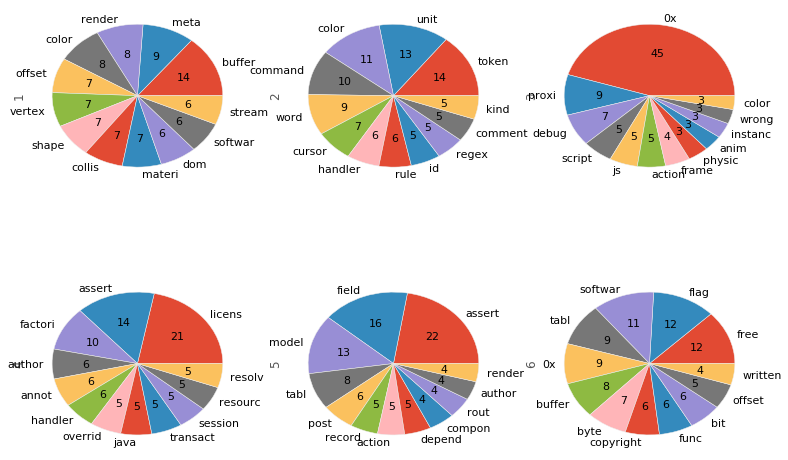

In [6]:
fig = plt.figure(1, figsize=(13,8))

df = topics_freq.reset_index(level=0)
df = df.drop('index', axis=1).T[0:12]
df
for i in range(1,NUM_TOPICS):
    ax = fig.add_subplot(2,3,i)
    df[i].astype(float).plot.pie(ax=ax, label=None, fontsize=11,
                    labels=topics.T.ix[0:12, i], autopct='%.d')
plt.tight_layout()
fig.savefig('topic-word'+suffix+'.png', bbox_inches='tight', dpi=400)

In [ ]:
latests_projects = proj_topic[proj_topic.date == "2016-01-01"].copy()
to_remove = ['express', 'derby', 'flask', 'symfony']
latests_projects = latests_projects[~latests_projects.project.isin(to_remove)]

# latests_projects[latests_projects.columns[0:NUM_TOPICS]] = latests_projects[latests_projects.columns[0:NUM_TOPICS]].applymap(lambda x: 0 if x>0.99 else x*100)
# latests_projects

In [ ]:
fig = plt.figure(1, figsize=(12,10))

df = latests_projects.reset_index(level=0)
df.set_index('project', inplace=True)
df = df.drop('index', axis=1).T[0:NUM_TOPICS-1]
df
for i in range(1,10):
    ax = fig.add_subplot(3,3,i)
    df.ix[:, i-1].astype(float).plot.pie(ax=ax, autopct='%.d',
                    labels=None#df.index.values
                                )

# h, l = ax.get_legend_handles_labels()
# plt.figlegend(h, df.index.values, loc='lower center',  ncol=5, bbox_to_anchor=(0.4, 0.02))
    
plt.tight_layout()
plt.savefig('project-topic'+suffix+'.png', dpi=400)


# 1- Each project evolution over time

In [ ]:
#Remove projects with unsuffient data
fig = plt.figure(3, figsize=(14,10))
to_remove = ['express', 'derby', 'flask', 'CodeIgniter']
temp = proj_topic[~proj_topic.project.isin(to_remove)]
proj_topic.shape

groups = temp.groupby('project')

i=1
print(groups.ngroups)
for name, p in groups:    
    ax = fig.add_subplot(4,3,i)
    i+=1
    ax = p[proj_topic.columns[0:NUM_TOPICS]].plot(logy=True, ax=ax)
    ax.set_xticklabels(p['date'].dt.strftime( "%Y-%m"))
    if p.shape[0] >10:
        ax.set_xticklabels([c for o,c in enumerate(p['date'].dt.strftime( "%Y-%m")) if o%2!=0])
        ax.set_xticks(np.arange(0, p.shape[0], 2))
    else:
        ax.set_xticklabels(p['date'].dt.strftime( "%Y-%m"))
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=30)
    ax.set_title(name)
    ax.legend([])
    print(name, p.shape)
    if i==13:
        break

plt.tight_layout()
fig.savefig('project_time'+suffix+'.png', dpi=350)

In [ ]:
# proj_topic[proj_topic['project']=='django']


In [7]:
# proj_topic

In [8]:
# groups = proj_topic.groupby('date')#.sum()

# for i, g in groups:
#     print(i, g.sum())
# ax = groups.plot()
# ax.legend(bbox_to_anchor=(1.3, 1))
# ax.set_yticklabels([])
# ax.set_ylabel('density')

(1, 10)


/home/doaa/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735964.0, right=735964.0
  'left=%s, right=%s') % (left, right))
/home/doaa/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


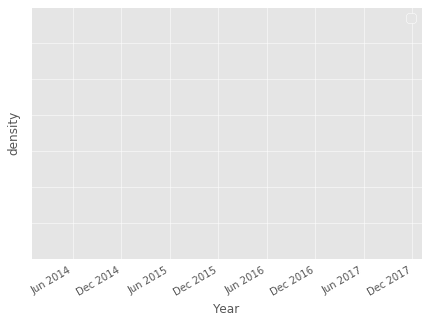

In [9]:
fig = plt.figure(5)
groups = proj_topic.groupby('date').mean()
print(groups.shape)

ax = groups.plot(figsize=(7,5))
# ax.legend(bbox_to_anchor=(1.25,.9))
ax.legend([])
ax.set_yticklabels([])
ax.set_ylabel('density')
ax.set_xlabel('Year')

# plt.tight_layout()
plt.savefig('topic_time'+suffix+'.png', bbox_inches='tight', dpi=350)

In [10]:

# proj_topic[proj_topic.date=='2016-01-01']

In [11]:
# f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
# for i, k in enumerate([0, 5, 9, 14, 19]):
#     ax[i].stem(topics.ix[k,:], linefmt='b-',
#                markerfmt='bo', basefmt='w-')
#     ax[i].set_xlim(-50,4350)
#     ax[i].set_ylim(0, 0.08)
#     ax[i].set_ylabel("Prob")
#     ax[i].set_title("topic {}".format(k))

# ax[4].set_xlabel("word")

# plt.tight_layout()


In [12]:
# df = proj_topic[proj_topic.date=='2016-01-01']


# f, ax= plt.subplots(7, 1, figsize=(8, 12), sharex=True)
# for i in range(7):
#     ax[i].stem(df.ix[i,0:10], linefmt='r-',
#                markerfmt='ro', basefmt='w-')
#     ax[i].set_xlim(-1, 21)
#     ax[i].set_ylim(0, 1)
#     ax[i].set_ylabel("Prob")
#     ax[i].set_title("{}".format(df.ix[i,10]))

# ax[6].set_xlabel("Topic")

# plt.tight_layout()
# plt.show()
# plt.savefig('project_topc'+suffix+'.png', bbox_inches='tight', dpi=350)

In [13]:
proj_topic.head()
# df = proj_topic[proj_topic.date=='2016-01-01']

# a = {}
# for i in range(NUM_TOPICS):
#     a[i] = df[df.ix[:,i]>0.8].project#.ix[:, 10:12]
#     print(len(a[i]))
#     a[i] = np.unique(a[i])
# a


,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,project,date
index,,,,,,,,,,,,
0hh1,0.157591,0.125517,0.000774,2.263356e-02,0.000021,0.000021,0.021477,1.000000,0.034453,0.006805,0hh1,2016-01-01
oryx,0.354821,0.000003,0.000003,2.557366e-06,0.283105,0.017611,0.000003,0.000003,1.000000,0.000003,oryx,2016-01-01
openage,0.239962,1.000000,0.749223,8.486259e-02,0.000016,0.000016,0.342532,0.209518,0.088536,0.050350,openage,2016-01-01
nupic,1.000000,0.028206,0.065635,5.821221e-07,0.001979,0.165810,0.002144,0.130865,0.104683,0.012699,nupic,2016-01-01
neovim,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,neovim,2016-01-01


# Clustering Analysis

In [14]:
projects_details = pd.read_csv(os.path.join(base_dir, 'results/projects_details.csv'), index_col=0)
# projects_details.rename(columns={'index': 'project'}, inplace=True)
                               

/home/doaa/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/doaa/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


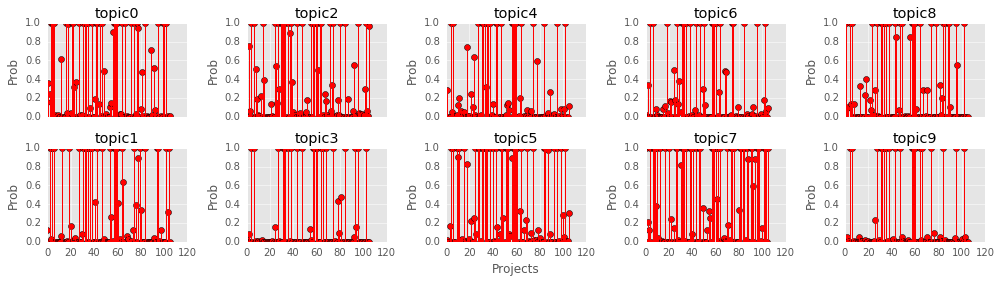

In [15]:
df = proj_topic[proj_topic.date=='2016-01-01']


f, ax= plt.subplots(2, 5, figsize=(14, 4), sharex=True)
for i in range(NUM_TOPICS):
    x = i%2
    y = int(i/2)
    ax[x][y].stem(df.ix[:,i], linefmt='r-',
               markerfmt='ro', basefmt='w-')
#     ax[x][y].set_xlim(-1, 21)
    ax[x][y].set_ylim(0, 1)
    ax[x][y].set_ylabel("Prob")
    ax[x][y].set_title("{}".format(df.columns[i]))

ax[x][y/2].set_xlabel("Projects")

plt.tight_layout()

plt.savefig('topic_projects'+suffix+'.png', bbox_inches='tight', dpi=350)

Data Visulization
Games Engines
Machine Learning
Text Editor
Web Framework
Web Games


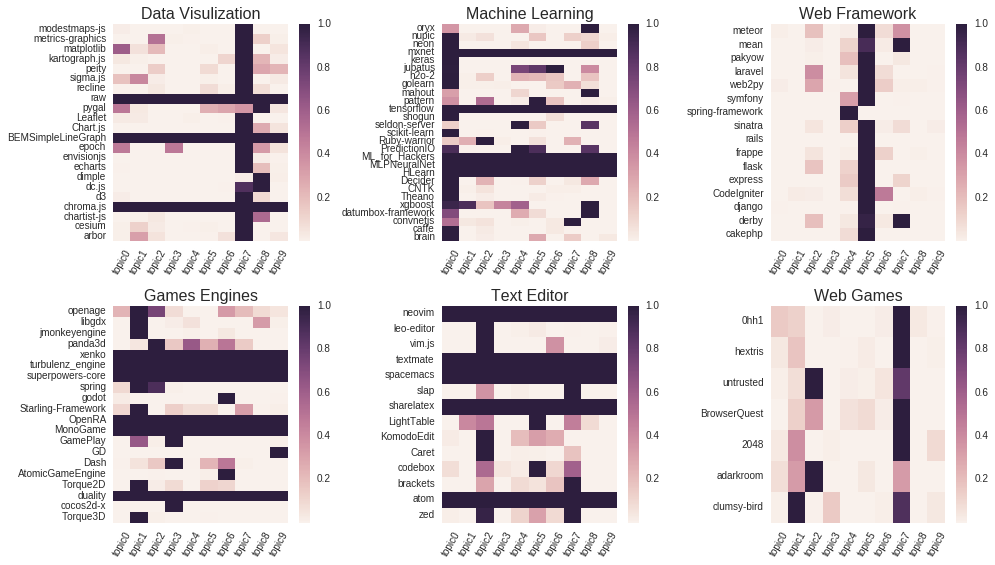

In [16]:
import seaborn as sns

to_remove =  ['neovim', 'mxnet', 'xenko', 'turbulenz_engine', 'textmate', 'tensorflow', 'superpowers-core',
             'spacemacs', 'sharelatex', 'raw', 'OpenRA', 'MonoGame', 'ML_for_Hackers', 'MLPNeuralNet', 
             'HLearn', 'BEMSimpleLineGraph', 'duality', 'chroma.js', 'atom']


projects = pd.merge(projects_details, proj_topic, right_index=True, left_index=True)
projects.reset_index(inplace=True)
df = projects#[~projects['index'].isin(to_remove)]
df.set_index('index', inplace=True)
categories = df.groupby('group')
categories.ngroups

f, ax= plt.subplots(2, 3, figsize=(14, 8))#, sharex=True)
   
for i, (name, g) in enumerate(categories):
    x = i%2
    y = int(i/2) 
    print(name)
    sns.heatmap(g.ix[:,2:NUM_TOPICS+2], ax=ax[x][y])#, cmap="RdBu_r", cbar=False)
    ax[x][y].set_title(name, fontsize=16)
    ax[x][y].set_ylabel('')
    labels = ax[x][y].get_xticklabels()
    plt.setp(labels, rotation=60)
    
plt.tight_layout()

plt.savefig('topic_projects_heatmap'+suffix+'.png', bbox_inches='tight', dpi=350)

In [17]:


projects['sum'] = projects.ix[:,2:2+NUM_TOPICS].sum(axis=1)
projects['type'].unique()

array(['JavaScript', 'Java', 'C++', 'Python', 'VimL', 'Ruby', 'PHP', 'Go',
       'HTML', 'C#', 'C', 'TypeScript', 'Emacs Lisp', 'CoffeeScript',
       'ActionScript', 'Scala', 'R', 'Objective-C', 'Clojure', 'Haskell',
       'D', 'CSS'], dtype=object)

In [18]:
x = projects[projects['sum'] >8]
print(x.shape)
x#.index
# projects.loc['superpowers-core']

(19, 15)


,group,type,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,project,date,sum
index,,,,,,,,,,,,,,,
neovim,Text Editor,VimL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,neovim,2016-01-01,10.0
mxnet,Machine Learning,C++,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,mxnet,2016-01-01,10.0
xenko,Games Engines,C#,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,xenko,2016-01-01,10.0
turbulenz_engine,Games Engines,TypeScript,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,turbulenz,2016-01-01,10.0
textmate,Text Editor,C++,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,textmate,2016-01-01,10.0
tensorflow,Machine Learning,C++,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,tensorflow,2016-01-01,10.0
superpowers-core,Games Engines,TypeScript,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,superpowers,2016-01-01,10.0
spacemacs,Text Editor,Emacs Lisp,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,spacemacs,2016-01-01,10.0
sharelatex,Text Editor,CoffeeScript,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sharelatex,2016-01-01,10.0


In [225]:
types = projects['type'].unique()
groups = projects['group'].unique()
df = pd.DataFrame(columns=["JavaScript", "Ruby", "Java", "C++", "C", "Python", "PHP", "C#", "Ruby", "Others"])
for d in projects.index:
    df.loc[] = 

,JavaScript,Ruby,Java,C/C++,Python,PHP,C#,Ruby,Others


In [314]:
groups = df.groupby('group')

for i, g in groups:
    print(str(i) + ': ' + str(g.shape[0]))

Data Visulization: 19
Games Engines: 14
Machine Learning: 22
Text Editor: 9
Web Framework: 16
Web Games: 7


In [315]:
df.shape[0]

87